In [1]:
import os
import cv2
import numpy as np
from skimage import feature
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline


In [2]:

def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = load_images_from_folder('D:\\333\\dataset\\train')
test_images, test_labels = load_images_from_folder('D:\\333\\dataset\\test')


In [3]:
def extract_hog_features(images):
    hog_features = []
    for img in images:
        hog_feature = feature.hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
        hog_features.append(hog_feature)
    return np.array(hog_features)

train_features = extract_hog_features(train_images)
test_features = extract_hog_features(test_images)

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Assuming train_features, test_features, train_labels_pred, and test_labels_pred are defined

def evaluate_kmeans_classifier(n_clusters, train_features, test_features):
    kmeans = KMeans(n_clusters=n_clusters)
    
    # Train KMeans clustering
    train_labels_pred = kmeans.fit_predict(train_features)
    
    # Use K-Means labels as the target for classification
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=n_clusters))
    model.fit(train_features, train_labels_pred)
    
    # Predict and evaluate on the test set
    test_labels_pred = kmeans.predict(test_features)
    predictions_test = model.predict(test_features)
    accuracy_test = accuracy_score(test_labels_pred, predictions_test)

    # Predict and evaluate on the training set
    predictions_train = model.predict(train_features)
    accuracy_train = accuracy_score(train_labels_pred, predictions_train)
    
    return accuracy_train, accuracy_test

# Example usage with 5 clusters
accuracy_train, accuracy_test = evaluate_kmeans_classifier(5, train_features, test_features)


c:\Users\hanfy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hanfy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


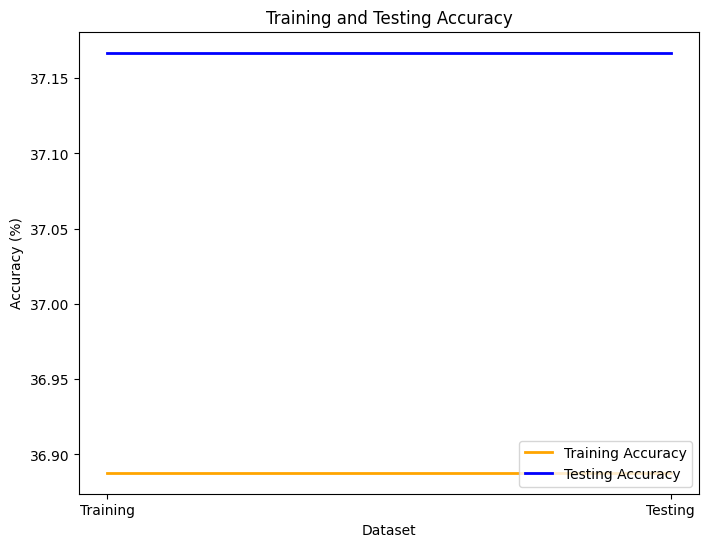

In [30]:
# Plot both training and testing accuracy
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [accuracy_train * 100, accuracy_train * 100], color='orange', lw=2, linestyle='-', label='Training Accuracy')
plt.plot([0, 1], [accuracy_test * 100, accuracy_test * 100], color='blue', lw=2, linestyle='-', label='Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy')
plt.xticks([0, 1], ['Training', 'Testing'])
plt.legend(loc="lower right")
plt.show()

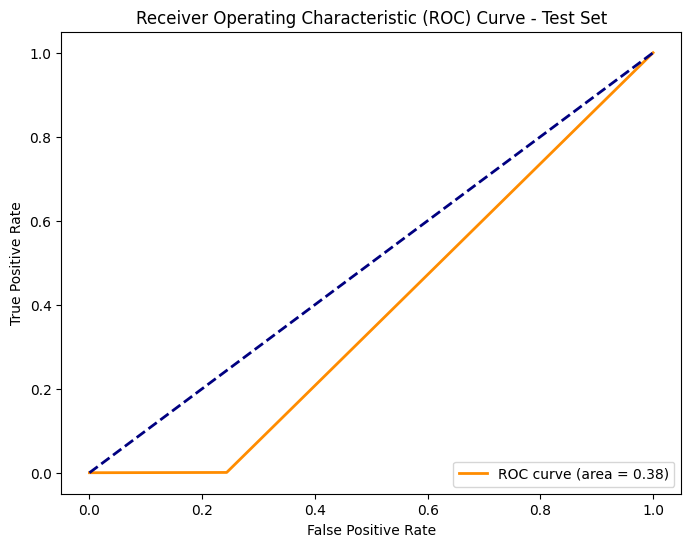

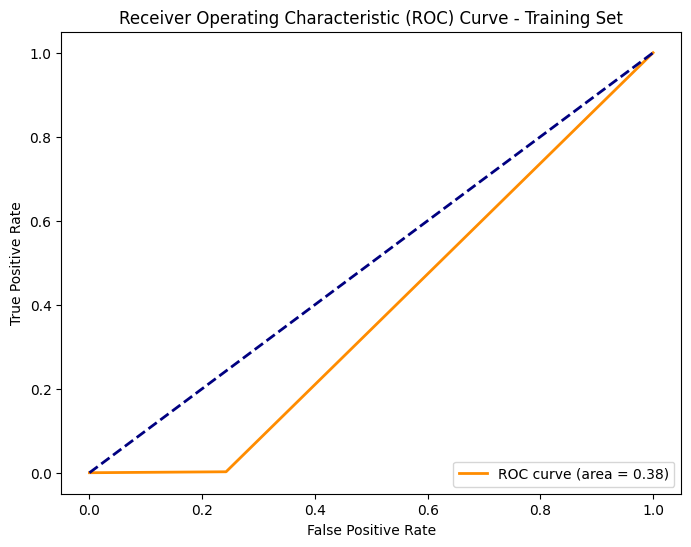

In [18]:








# Convert labels to binary format for test set
test_labels_binary = np.where(test_labels_pred == 1, 1, 0)
predictions_binary_test = np.where(predictions_test == 1, 1, 0)

# ROC Curve for test set
fpr_test, tpr_test, thresholds_test = roc_curve(test_labels_binary, predictions_binary_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve for test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc="lower right")
plt.show()

# Convert labels to binary format for training set
train_labels_binary = np.where(train_labels_pred == 1, 1, 0)
predictions_binary_train = np.where(predictions_train == 1, 1, 0)

# ROC Curve for training set
fpr_train, tpr_train, thresholds_train = roc_curve(train_labels_binary, predictions_binary_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC Curve for training set
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Set')
plt.legend(loc="lower right")
plt.show()
